In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_movie_reviews = pd.read_csv("movie_reviews_with_info.csv", index_col=0)
df_movie_reviews.loc[0]

Movie                                                           47 RONIN
Review                 Heavy on CGI, light on entertainment, 47 Ronin...
Score                                                               40.0
Average Movie Score                                                 44.5
Film Rating                                                       PG-13 
Description            Based on the original 1941 movie from Japan, a...
budget                                                       175000000.0
box office                                                   150962475.0
all genres                                Action|Adventure|Drama|Fantasy
Action                                                                 1
Adventure                                                              1
Animation                                                              0
Comedy                                                                 0
Crime                                              

In [2]:
df_movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18713 entries, 0 to 18712
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Movie                18713 non-null  object 
 1   Review               18713 non-null  object 
 2   Score                18713 non-null  float64
 3   Average Movie Score  18713 non-null  float64
 4   Film Rating          18713 non-null  object 
 5   Description          18713 non-null  object 
 6   budget               18713 non-null  float64
 7   box office           18713 non-null  float64
 8   all genres           18713 non-null  object 
 9   Action               18713 non-null  int64  
 10  Adventure            18713 non-null  int64  
 11  Animation            18713 non-null  int64  
 12  Comedy               18713 non-null  int64  
 13  Crime                18713 non-null  int64  
 14  Drama                18713 non-null  int64  
 15  Family               18713 non-null 

# Dataset Stats

The overall variation(based on mean absolute deviation) on critic scores for movies is 11.2 points(on a 0-100 point scale). On average, movies in this dataset make 3.5 times their original budget, with the median being 3.1 times. 96.5% of movies manage to break even at the very least. 

In [3]:
df_movie_reviews.groupby("Movie")["Score"].mad().mean()
# df_movie_reviews.plot.scatter(x="box office", y="Score")

11.825676590331852

In [4]:
(df_movie_reviews["box office"]/df_movie_reviews["budget"]).mean()

3.5039159886638127

In [5]:
(df_movie_reviews["box office"]/df_movie_reviews["budget"]).median()

3.062988172972973

In [6]:
(df_movie_reviews["box office"] > df_movie_reviews["budget"]).value_counts(normalize=True)

True     0.965051
False    0.034949
dtype: float64

# Analyze Average Movie Scores Based On Genre

Regarding individual genres, movies in the "War", "Drama" and "Animation" genres seem to do the best, while "Fantasy" and "Western" are the worst performing.

However, this does not seem to directly translate to how a mixture of genres will do overall. For example, a combination of Action, Adventure, and Thriller is the 7th best hybrid-genre category despite its individual genres being apart of the lower performaning genres.

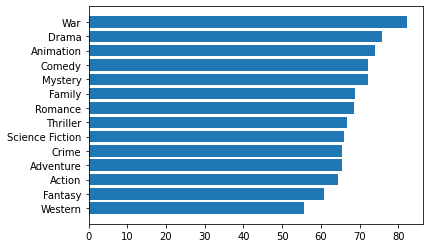

In [7]:
genres = df_movie_reviews.columns[9:]

genre_score_dict = {}
for genre in genres:
    valid_reviews_df = df_movie_reviews[df_movie_reviews[genre] == 1]
    genre_score_dict[genre] = valid_reviews_df["Score"].mean()
genre_score_dict = dict(sorted(genre_score_dict.items(), key=lambda item: item[1], reverse=True))
genre_score_dict


y_pos = np.arange(len(genre_score_dict))
performance = genre_score_dict.values()
fig, ax = plt.subplots()
hbars = ax.barh(y_pos, performance, align='center')
ax.set_yticks(ticks=y_pos)
ax.set_yticklabels(genre_score_dict.keys())
ax.invert_yaxis()  # labels read top-to-bottom

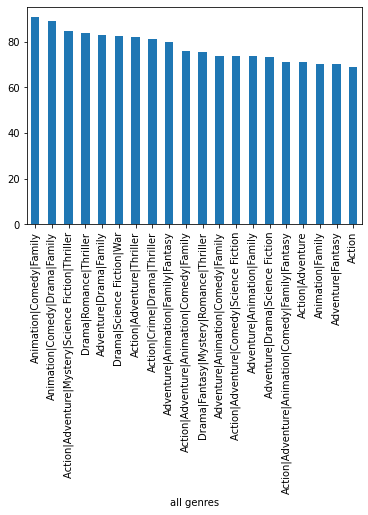

In [8]:
#best performing combination of dramas; take notice of the last one
df_movie_reviews.groupby("all genres")["Score"].mean().sort_values(ascending=False).head(20).plot.bar()

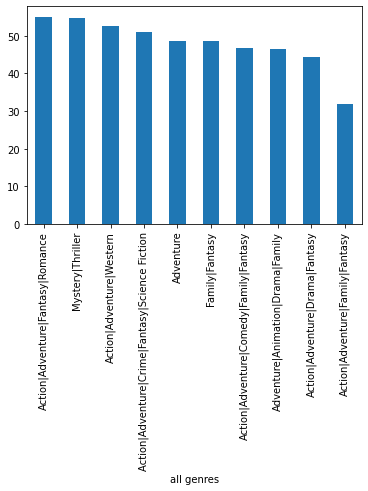

In [9]:
#worst performing combination of dramas; take notice of the last one
df_movie_reviews.groupby("all genres")["Score"].mean().sort_values(ascending=False).tail(10).plot.bar()

# Correlation Between Money Invested/Earned and Movie Scores

There is some correlation between the box office sales and average movie score, R-value of 0.377, which is logical(better sales = higher rated movies).

There seems to be no correlation between a movie's budget and its average score given an R-value of 0.044.

There appears to be some correlation between a movie's budget and box office sales given an R-value of 0.390(larger budget = better sales on release).

In [10]:
df_movie_reviews.drop_duplicates(subset=['Movie']).corr()

,Score,Average Movie Score,budget,box office,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,Mystery,Romance,Science Fiction,Thriller,War,Western
Score,1.000000,0.651277,-0.026708,0.382247,-0.195803,-0.199114,0.210951,0.142156,0.051748,0.087160,0.106745,-0.179899,-0.010678,0.047140,-0.075539,-0.092902,0.081962,-0.115951
Average Movie Score,0.651277,1.000000,0.043995,0.376900,-0.220020,-0.139090,0.288293,0.230741,0.010160,0.154954,0.130626,-0.256668,0.071466,0.061911,-0.012638,-0.015018,0.135992,-0.102683
budget,-0.026708,0.043995,1.000000,0.389770,0.232492,0.093083,-0.186552,-0.136427,0.160046,-0.126940,-0.206428,0.095147,-0.128882,-0.090789,0.041801,-0.032218,-0.089716,0.075093
box office,0.382247,0.376900,0.389770,1.000000,0.101742,-0.047472,0.010579,0.017611,0.145912,-0.040541,-0.139836,-0.052106,-0.103264,0.084294,0.047688,0.044154,-0.065501,-0.173809
Action,-0.195803,-0.220020,0.232492,0.101742,1.000000,0.278250,-0.585142,-0.297802,0.189484,-0.268998,-0.646693,0.069886,-0.165851,-0.059536,0.402164,0.188710,-0.134005,0.107143
Adventure,-0.199114,-0.139090,0.093083,-0.047472,0.278250,1.000000,-0.095841,-0.004245,-0.179882,-0.289542,-0.067369,0.120963,-0.145335,-0.145335,0.242563,-0.269678,-0.194933,-0.101713
Animation,0.210951,0.288293,-0.186552,0.010579,-0.585142,-0.095841,1.000000,0.570294,-0.130259,-0.024325,0.751581,-0.223911,-0.105242,-0.105242,-0.395118,-0.241560,-0.051818,-0.073654
Comedy,0.142156,0.230741,-0.136427,0.017611,-0.297802,-0.004245,0.570294,1.000000,-0.101936,-0.049738,0.464596,-0.054380,-0.082359,-0.082359,-0.249512,-0.189036,-0.040551,-0.057639
Crime,0.051748,0.010160,0.160046,0.145912,0.189484,-0.179882,-0.130259,-0.101936,1.000000,0.045756,-0.173313,-0.097110,-0.051571,-0.051571,-0.106402,0.320037,-0.025392,-0.036092
Drama,0.087160,0.154954,-0.126940,-0.040541,-0.268998,-0.289542,-0.024325,-0.049738,0.045756,1.000000,-0.035627,-0.056956,0.091334,0.254430,-0.137028,0.168042,0.285878,-0.050223


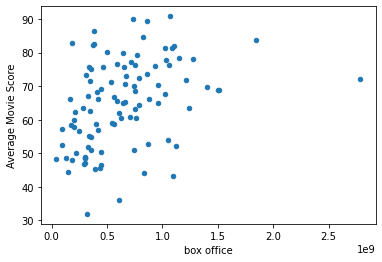

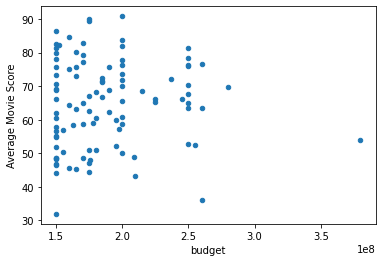

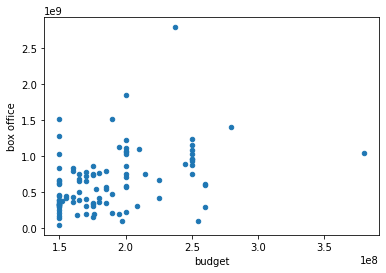

In [11]:
df_movie_reviews.drop_duplicates(subset=['Movie']).plot.scatter(x="box office", y="Average Movie Score")
df_movie_reviews.drop_duplicates(subset=['Movie']).plot.scatter(x="budget", y="Average Movie Score")
df_movie_reviews.drop_duplicates(subset=['Movie']).plot.scatter(x="budget", y="box office")